<a href="https://colab.research.google.com/github/vijayc9/Mall-Customer-Segmentation-K-Means/blob/main/customer_segmentation_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [105]:
# read the csv file from the path
path = "/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"
data = pd.read_csv(path)

In [106]:
# display first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
data.shape

(200, 5)

In [108]:
# Droping unnecessary feature
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## Univariate Analysis

In [110]:
# check the descriptive analysis
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

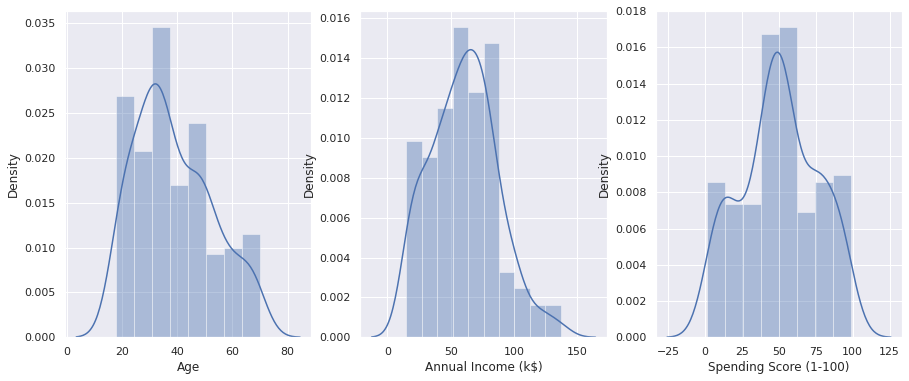

In [111]:
# checking for the numerical variables

col = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
    
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.distplot(data[i] , ax=ax)

plt.show();

We see that:
1. There is steep rise but gradual decrease in age. This means that we have more younger and mid age people.
2. The annual income shows most people have salares less than 100 k per annum.
3. The spending score is sort of normally distributed with mean around 50 k

In [112]:
# percentage of male and female in our data
data["Gender"].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

From above:
1. There are 56% of female and 44% of male in data

<Figure size 432x288 with 0 Axes>

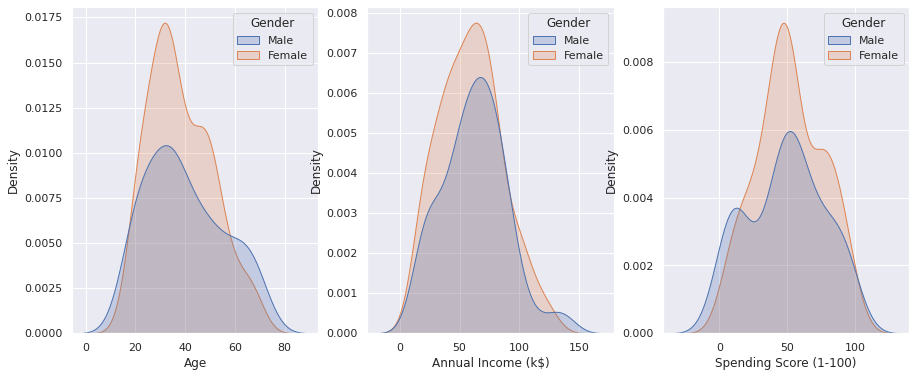

In [113]:
# Ploting the distribution of different gender behaviour
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.kdeplot(data[i],shade = True, hue = data["Gender"] , ax=ax)

plt.show();

From above:
1. Females of year from 30-40 years are predominantly present in data
2. The females costomers have better annual income compared to male costomers
3. The spending score of Female is better than Male.

<Figure size 1080x432 with 0 Axes>

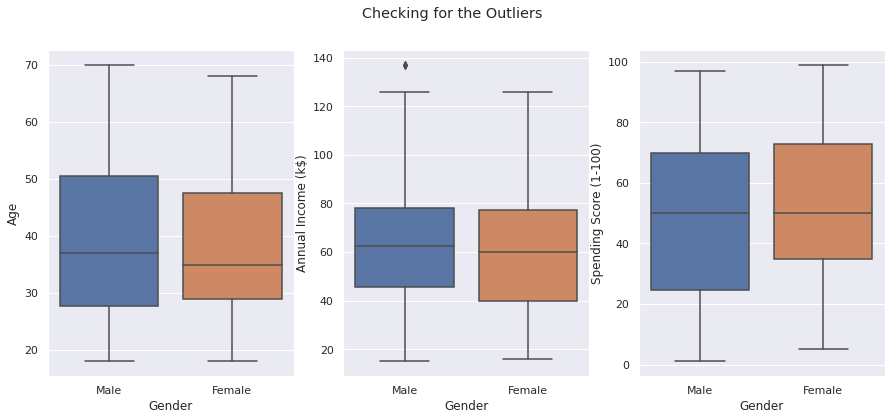

In [114]:
# checking for outliers
plt.rc('figure', figsize=(15, 6))  
fig=plt.figure()
fig , axes = plt.subplots(ncols = 3, nrows = 1)
for i, ax in zip (col, axes.flat):
    sns.boxplot( data = data, x = "Gender", y = data[i], ax = ax)
fig.suptitle('Checking for the Outliers')
plt.show();


From above:
1. Starting age of male amd female is nearly same.
2. The median age of male is greater than female
3. Younger women are more predominant 
4. female start shopping from less income range compared to male
5. Male shoppers has outliers when compared as per their income
6. Median annual income of male is slightly more than female
7. Spending score of female is higher than male
8. Median of spending score of male and female is nearly same

# Bivariate Analysis

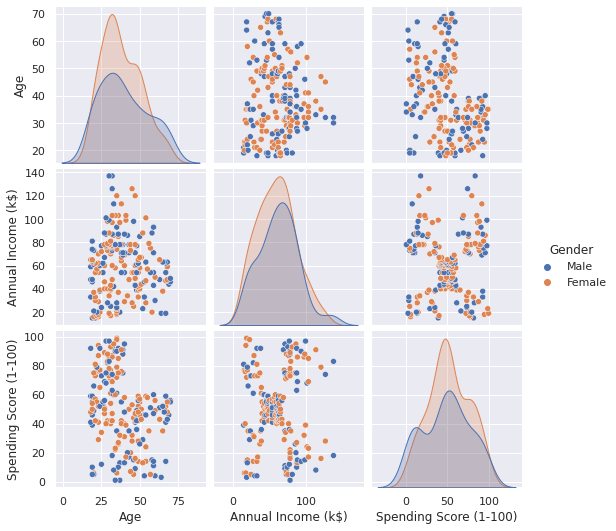

In [116]:
# checking the relationship between the different pairs of variables 
sns.pairplot(data, hue='Gender')

We see that there is a nice cluster between the pair plot of Annual Income and spending score

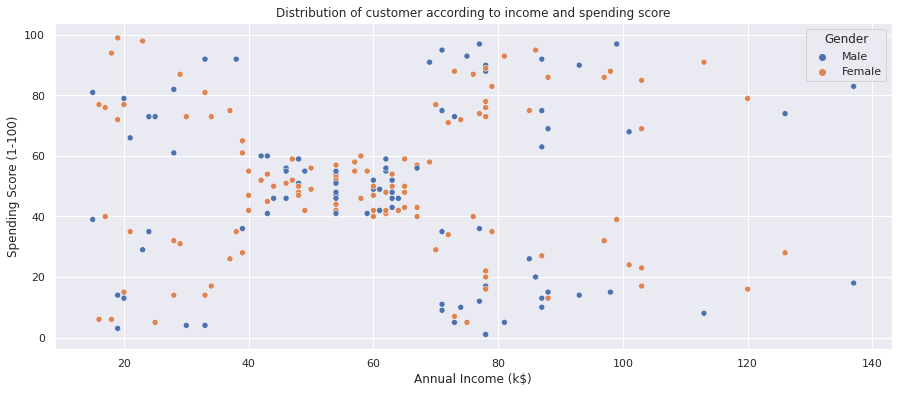

In [117]:
# let us check the spending score as per the annual income
sns.scatterplot(data = data, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")
plt.title("Distribution of customer according to income and spending score");

From above:
1. We can see 5 clusters in the plot above. 
2. The desired cluster is high income and high spending score
3. Men and women behave somewhat similarly 

**So we will give one of the 5 lebels to each customer, so that we can target the customers belonging to each gruop seperately, because customers in a group behave similarly**
- We will do this using **K-Means**, first we will find optimal no of cluster using **Elbow method**, this optimal value we already know using sactter plot which is 5, and then, we will label each customer.

In [118]:
# checking the statistic as per the gender
data.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


From above:
1. The mean age of male and female is nearly same
2. Average annual income of male is more than female
3. However, the mean of spending score of female is more than male

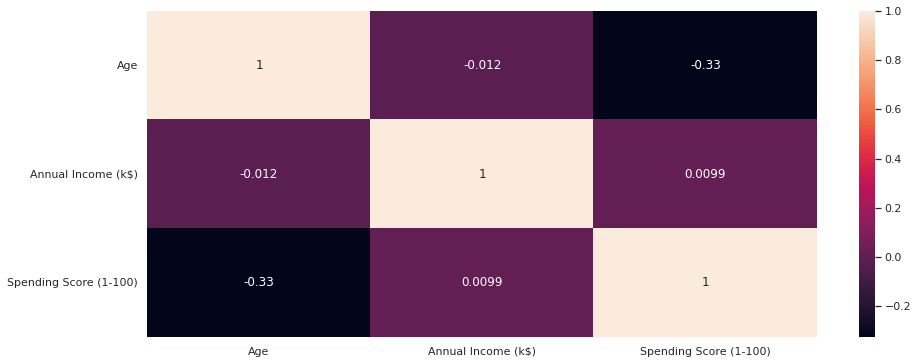

In [119]:
# Creating the heatmap
sns.heatmap(data.corr(), annot = True)

From above:
1. The Age has negative correlation with spending score and income.
2. This means that older people spends less
3. The annual income decrease with the increase in age
4. The only positive correlation is between annual income and spending score.
5. However the value is still small.

## K-Means for grouping the customers

In [145]:
# finding the optimal value of inertia for determining the optimal number of clusters
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit( data[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores.append(kmeans.inertia_)

Text(0.5, 1.0, 'Checking the optimal number of clusters')

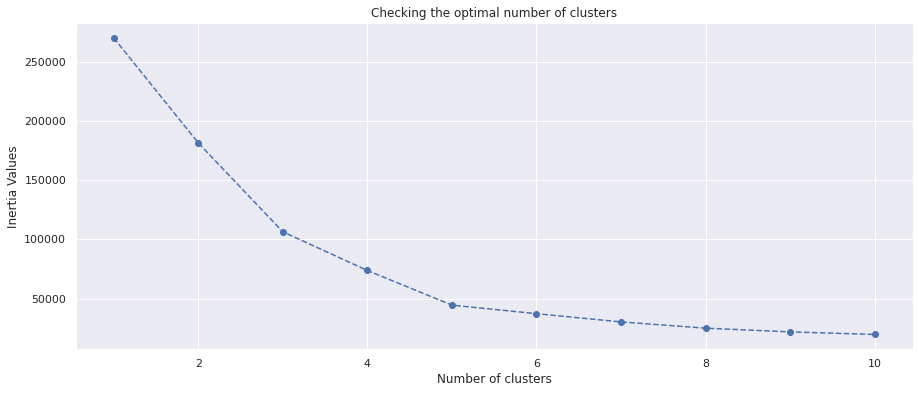

In [146]:
#Plot the elbow graph for optimal k 
plt.plot(range(1, 11), inertia_scores, 'bo--')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Values")
plt.title("Checking the optimal number of clusters")

**Within-cluster-sum-of-square(WCSS)/Loss/Inertia** measures how well a dataset was clustered by K-Means. It is calculated by measuring the sum of square of the distance of each point from it's nearest centroid. The low the value of inertia the compact is the cluster, and that is what we want.

In the **elbow method**, we plot the inertia value for each k and look for the elbow point where the rate of decrease shifts. This elbow point can be used to determine the optimal K. However, if the data is not clustered then this method may not work well.

As per the elbow method the **optimal k** value is **5**

In [147]:
# fitting the best model
kmeans = KMeans(n_clusters = 5).fit(data[["Annual Income (k$)", "Spending Score (1-100)"]])

# creating the data with label/cluster_no/group_no column
data["Cluster_no"] = kmeans.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_no
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [148]:
# finding the center of the clusters 
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ["x", "y"]

Text(0.5, 1.0, 'Clusters with the centroid')

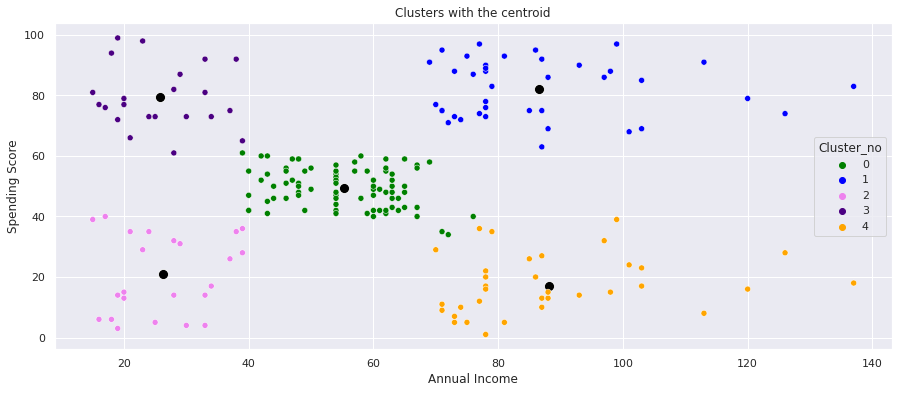

In [150]:
# clusters with the centroid 
fig, ax = plt.subplots(1,1)
ax = sns.scatterplot(data = data, x = centers["x"], y = centers["y"], color = "black", s = 100)
colors=['green', 'blue', 'violet', 'indigo', 'orange']
ax = sns.scatterplot(data = data, x = "Annual Income (k$)", y = "Spending Score (1-100)",palette=colors, hue='Cluster_no')

ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
plt.title("Clusters with the centroid")

In [152]:
# checking mean as per bivariate
data.groupby("Cluster_no").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_no,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


**Conclusions**:
- There are 5 clusters
- The cluster 1 is high income and high spending group.
- Cluster 2 is not a favourable group as it is low income and low spending group.
- Cluster 3 is low income high Spending group and it consists of mainly younger people of mean age 25.
- Younger people tends to spend more than older people, so focus should be done on older people
- Focus on cluster 4 must be done as they have high annual income but low spending score

In [153]:
pd.crosstab(data["Cluster_no"], data["Gender"], normalize = "index")

Gender,Female,Male
Cluster_no,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


Here Women and men are equaly distributed over variour cluster, except for cluster 2, which is low income and low spending group, so no need to focus men and women group separately.

#Multivariate Analysis

**Tasks**:
- take all the features and standardize it
- use k-means to calculate the optimal k
- label the clusters
- use tSNE to visualize the clusters, tSNE is a distance based method so best for k_means visualization
- you have labels of different clusters, so analyse them and make conclusions or devise plan 


In [189]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [155]:
# drop the Cluster_no
data.drop('Cluster_no', axis=1, inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [160]:
# convert the Gender into numerical feature, gives a different copy
data_num = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data_num.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [161]:
# Do the feature scaling, needed as calculating the distances bw datapoints
data_std = pd.DataFrame(StandardScaler().fit_transform(data_num))
data_std.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [165]:
# finding the optimal value of inertia for determining the optimal number of clusters
inertia_scores = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std)
    inertia_scores.append(kmeans.inertia_)

Text(0.5, 1.0, 'Checking the optimal number of clusters')

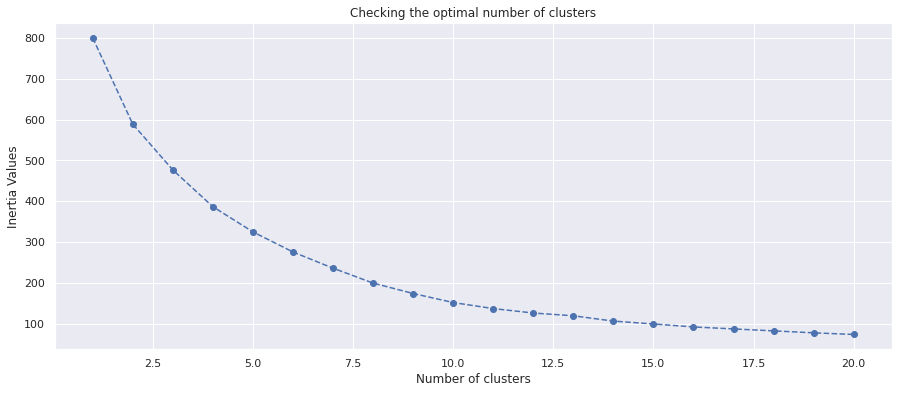

In [166]:
#Plot the elbow graph for optimal k 
plt.plot(range(1, 21), inertia_scores, 'bo--')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Values")
plt.title("Checking the optimal number of clusters")

**It is very hard to say what is the optimal k value** as there is no sharp drop and rise
- so we take k=3, k=4 and k=5 and visualize it using tSNE to see the best k
- It would have been better if we would have some domain knowledge or preference of no of clusters like: in how many groups we want to divide our customers into, should we go for big k or small k etc...

In [227]:
# fitting the best models
kmeans3 = KMeans(n_clusters = 3, random_state = 42).fit(data_std)
kmeans4 = KMeans(n_clusters = 4, random_state = 42).fit(data_std)
kmeans5 = KMeans(n_clusters = 5, random_state = 42).fit(data_std)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


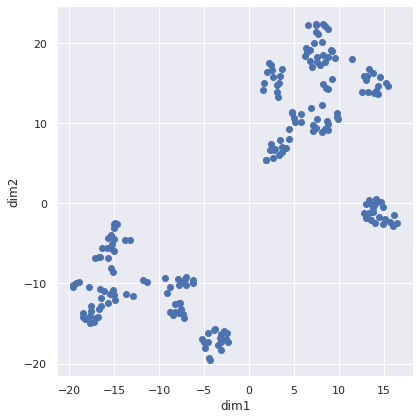

In [295]:
# Using tSNE for visualization
# Check the tSNE for different values of perplexity(tried it with different values, best=20)(total datapoints=200)
model = TSNE(n_components=2, perplexity=20, random_state=0)
tsne_data = model.fit_transform(data_std)
tsne_df = pd.DataFrame(data=tsne_data, columns=('dim1', 'dim2'))

# Ploting the tSNE
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'dim1', 'dim2')
plt.show()

In [296]:
# Adding the labels for group visualization
tsne_df['cluster_k3'] = kmeans3.labels_
tsne_df['cluster_k4'] = kmeans4.labels_
tsne_df['cluster_k5'] = kmeans5.labels_

In [297]:
tsne_df.head()

,dim1,dim2,cluster_k3,cluster_k4,cluster_k5
0,-9.368945,-9.375062,0,3,1
1,-7.033938,-9.155107,0,3,1
2,1.491197,14.171765,1,2,2
3,2.377402,6.663591,0,1,0
4,3.160819,13.233071,1,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


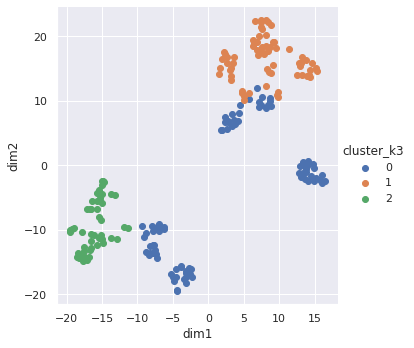

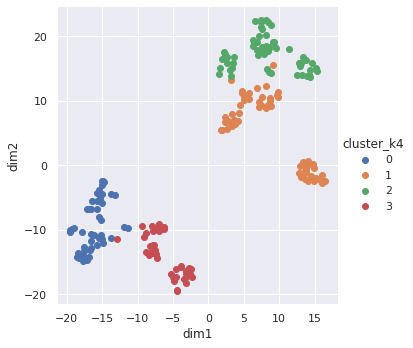

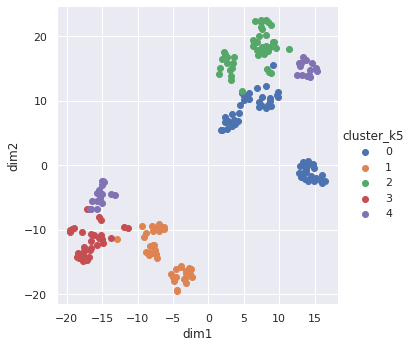

In [298]:
sns.FacetGrid(tsne_df, hue='cluster_k3', size=5).map(plt.scatter, 'dim1', 'dim2').add_legend()
sns.FacetGrid(tsne_df, hue='cluster_k4', size=5).map(plt.scatter, 'dim1', 'dim2').add_legend()
sns.FacetGrid(tsne_df, hue='cluster_k5', size=5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

**We see that k=4 is the optimal value of k**
- For k=4 customers of different groups are beautifully clustered

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


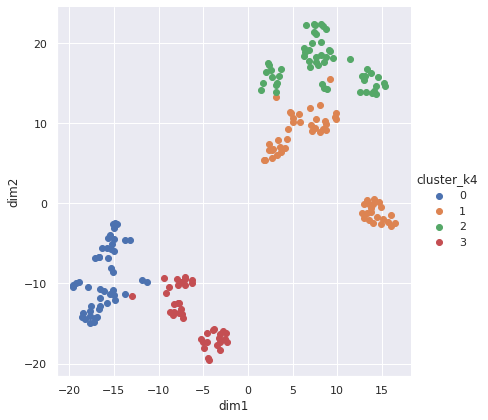

In [307]:
# tSNE plot for k=4
sns.FacetGrid(tsne_df, hue='cluster_k4', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

In [301]:
# Labeling our datapoint with their group value
data['cluster_no'] = kmeans4.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_no
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,1


Now we can target customers of same cluster and devise different plans for them

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


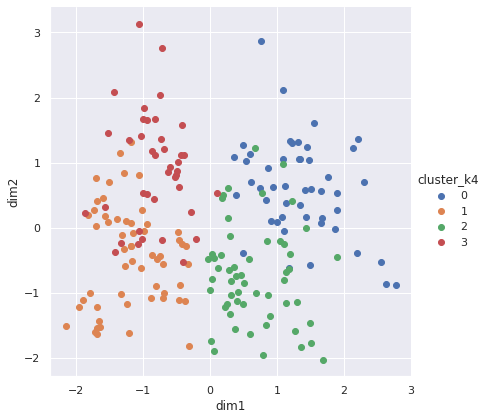

In [305]:
# Doing the visualization using PCA, just for pun!!
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(data_std)
pca_df = pd.DataFrame(data=pca_data, columns=('dim1', 'dim2'))
pca_df['cluster_k4'] = kmeans4.labels_

# Ploting the PCA
sns.FacetGrid(pca_df, hue='cluster_k4', size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

PCA is giving the results as expected, customers of different groups are randomly distributed with very little clustering pattern!!
- Because PCA tries to preserve the variance, it only looks at the global structure of the data not the local stucture, so the points which are well seperated in higher dimensions may not be seperated in lower dimentions when doing dimensionaliy reduction using PCA
- One the other hand tSNE tries to project the higher dimension data into lower dimension such that the neighbourhood distance is preserved, that's why it is giving so good results(related to k-means!!, kindda). This way tSNE tries to preserve the local staructre as well.   